In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met, u_statistics, u_plot
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pandas as pd
import pickle as pkl
from utils import constants as cnst


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [117]:
path = cnst.network_data + '/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/totrack/'

In [174]:
msgopen = pd.read_csv('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/totrack/cores_gt15000km2_table_AMSRE_tracking_SM0finite_17.csv', na_values=-999)

In [175]:
vera = xr.open_dataset('/media/ck/Elements/Africa/WestAfrica/cores_fromMeteosat_VERA/cores/coresPower_MSG_-40_700km2_-50points_dominant_2006_06.nc')

In [176]:
msgopen.head()

,id,year,month,day,hour,lon,lat,xloc,yloc,area,...,SMmean0,SMdry0,SMwet0,SMmean-1,SMdry-1,SMwet-1,LSTAmean,LSTAslotfrac,dtime,ERAqmean
0,0,2006,6,1,17,-6.272066,10.278089,379,231,16150,...,2.163220,0.0,1.0,NaN,0.0,0.0,-2.486118,0.035065,1.0,15.04
1,2,2006,6,1,17,-7.484792,10.322570,336,233,16150,...,6.199917,0.0,1.0,NaN,0.0,0.0,-0.424518,0.062574,0.0,14.91
2,4,2006,6,1,17,-7.574623,10.411511,333,236,16150,...,6.462015,0.0,1.0,NaN,0.0,0.0,-0.621312,0.064935,0.0,14.92
3,5,2006,6,1,17,-6.676308,10.411511,365,236,16150,...,3.800810,0.0,1.0,NaN,0.0,0.0,-1.909900,0.055659,1.0,15.00
4,22,2006,6,1,17,-5.867824,14.690426,398,388,15475,...,-1.191141,1.0,0.0,NaN,0.0,0.0,7.146761,0.875974,2.0,11.11


In [177]:
box = [-10,10,10,16]

In [178]:
MCSfromfile = xr.open_dataarray('/home/ck/DIR/cornkle/MCSfiles/blob_map_allscales_-50_JJAS_points_dominant.nc')
mff = MCSfromfile.sel(time=(MCSfromfile['time.hour']==17), lat=slice(box[2],box[3]), lon=slice(box[0],box[1]))
mfday = mff.sel(time='20060601')#.squeeze()
mfday1 = mff.sel(time='20060601').squeeze()

In [179]:
MCSfromfile

<xarray.DataArray (time: 12540, lat: 253, lon: 519)>
[1646589780 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -11.66 -11.62 -11.57 -11.53 ... 11.51 11.56 11.6
  * lat      (lat) float64 8.986 9.03 9.075 9.119 ... 19.87 19.91 19.95 19.99
  * time     (time) datetime64[ns] 2006-06-01 ... 2010-09-30T23:00:00

In [180]:
mfday

<xarray.DataArray (time: 1, lat: 137, lon: 445)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]])
Coordinates:
  * lon      (lon) float64 -9.955 -9.91 -9.865 -9.82 ... 9.853 9.898 9.943 9.987
  * lat      (lat) float64 10.01 10.06 10.1 10.14 ... 15.87 15.91 15.95 16.0
  * time     (time) datetime64[ns] 2006-06-01T17:00:00

In [166]:
#df.loc[df['column_name'] == some_value]
msg_day1 = msgopen.loc[(msgopen['month']==6) & (msgopen['day']==1) & (msgopen['year']==2006)]

In [190]:
msg_day_test = msgopen.loc[(msgopen['month']==8) & (msgopen['year']==2006) & (msgopen['lon']>-2) & (msgopen['lon']<2)]

In [191]:
uni, num = np.unique(msg_day_test['day'], return_counts=True)

In [192]:
num

array([ 1,  7,  2,  4,  1,  5, 19, 21, 10,  4])

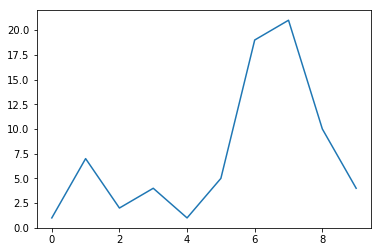

In [193]:
plt.plot(num)

In [168]:
vera['time.hour']

<xarray.DataArray 'hour' (time: 1436)>
array([ 0,  0,  1, ..., 22, 23, 23])
Coordinates:
  * time     (time) datetime64[ns] 2006-06-01 ... 2006-06-30T23:30:00

In [169]:
ver17 = vera.sel(time=(vera['time.hour']==17), lat=slice(box[2],box[3]), lon=slice(box[0],box[1]))

In [170]:
ver17

<xarray.Dataset>
Dimensions:  (lat: 137, lon: 445, time: 60)
Coordinates:
  * lat      (lat) float64 10.01 10.06 10.1 10.15 ... 15.87 15.91 15.96 16.0
  * lon      (lon) float64 -9.959 -9.914 -9.869 -9.824 ... 9.894 9.938 9.983
  * time     (time) datetime64[ns] 2006-06-01T17:00:00 ... 2006-06-30T17:30:00
Data variables:
    blobs    (time, lat, lon) int16 ...
    tir      (time, lat, lon) int16 ...
Attributes:
    radii:              [3 4 5]
    scales_rounded:     [25 35 50]
    scales_original:    [25.         35.35533906 50.        ]
    cutout_T:           -40
    cutout_minPixelNb:  28.0

In [171]:
ver_day = ver17.sel(time='20060601')

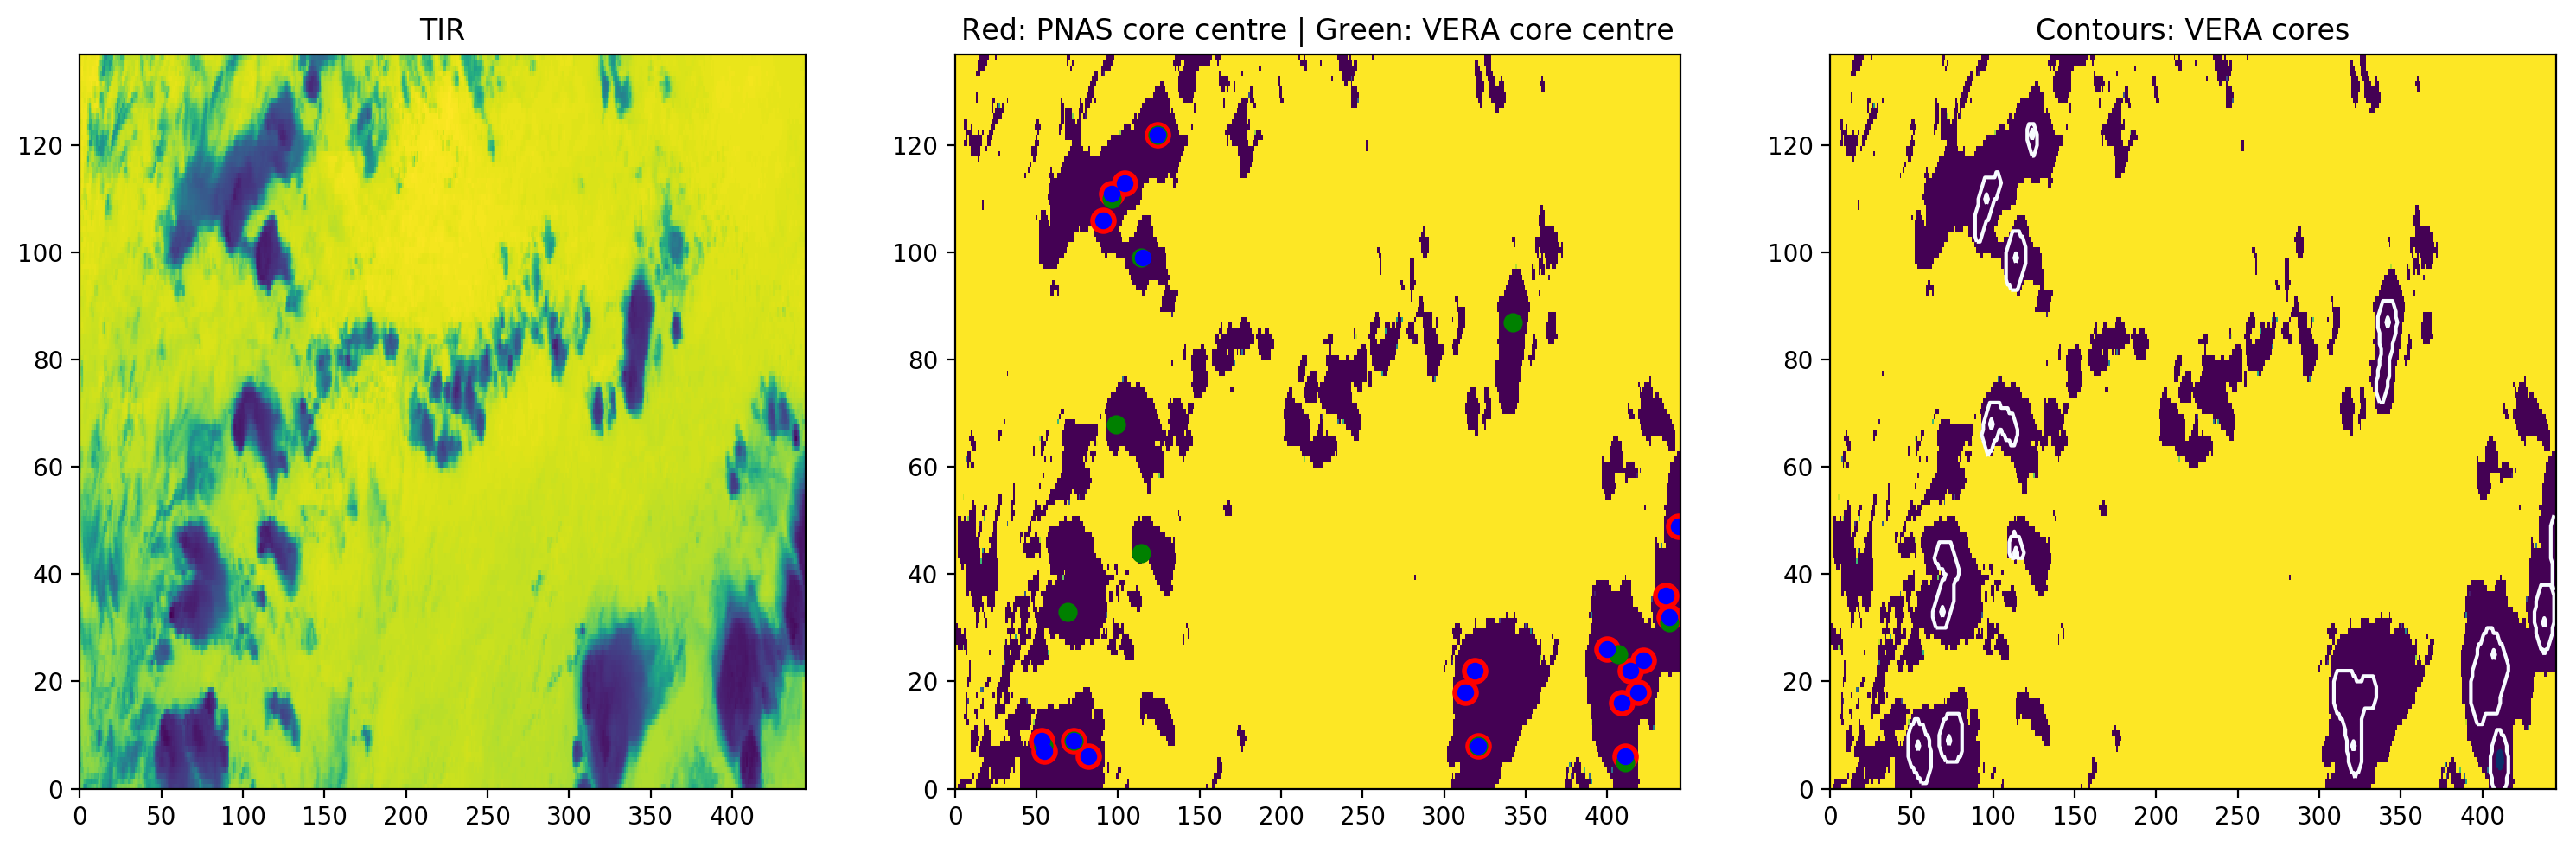

In [172]:
lon, lat = np.meshgrid(ver_day['lon'], ver_day['lat'])

f = plt.figure(figsize=(15,5), dpi=200)
f.add_subplot(131)
plt.pcolormesh(ver_day['tir'][0,:,:])

npos = np.where(ver_day['blobs'][0,:,:]<-100)

mpos = np.where((mfday1>=15) & (mfday1<=65))
plt.title('TIR')

#ipdb.set_trace()

    
f.add_subplot(132)
for ids, ms in msg_day1.iterrows():
    
    try:
        point = ver_day.sel(lat=ms['lat'], lon=ms['lon'], method='nearest', tolerance=0.04)
    except KeyError:
        continue
    plat = point['lat'].values
    plon = point['lon'].values


    xpos = np.where(ver_day['lon'].values == plon)
    xpos = int(xpos[0])
    ypos = np.where(ver_day['lat'].values == plat)
    ypos = int(ypos[0])

    plt.plot(xpos, ypos, color='red', markersize=10, marker='o')
    
for y,x in zip(npos[0], npos[1]):
    
    #ipdb.set_trace()
    
    plt.plot(x,y, marker='o', color='green', markersize=7)
    
plt.title('Red: PNAS core centre | Green: VERA core centre')
    
for y,x in zip(mpos[0], mpos[1]):
    
    xx = mfday.lon[x]
    yy = mfday.lat[y]
    
    try:
        point = ver_day.sel(lat=yy.values, lon=xx.values, method='nearest', tolerance=0.04)
    except KeyError:
        ipdb.set_trace()
    plat = point['lat'].values
    plon = point['lon'].values


    xpos = np.where(ver_day['lon'].values == plon)
    xpos = int(xpos[0])
    ypos = np.where(ver_day['lat'].values == plat)
    ypos = int(ypos[0])
    #ipdb.set_trace()
    plt.plot(xpos, ypos, color='blue', markersize=6, marker='o')
plt.pcolormesh(ver_day['tir'][0,:,:], vmax=-65, vmin=-90)

f.add_subplot(133)
plt.pcolormesh(ver_day['tir'][0,:,:], vmax=-65, vmin=-90)
plt.contour(ver_day['blobs'][0,:,:], vmin=1, vmax=20, cmap='Blues')
plt.title('Contours: VERA cores')
plt.tight_layout()
    
#plt.savefig('/home/ck/DIR/cornkle/figs/CORE_MEMORY/large_storm.png')

In [43]:
#     file = cnst.MCS_POINTS_DOM #MCS_TMIN #
#     path = cnst.network_data + 'figs/LSTA/corrected_LSTA/new/wavelet_coefficients/' #corrected_LSTA/wavelet/large_scale

#     msg = xr.open_dataarray(file)
#     msg = msg[(msg['time.hour'] == hour) & (msg['time.minute'] == 0) & (
#         msg['time.year'] >= 2006) & (msg['time.year'] <= 2010) & (msg['time.month'] >= 6) & (msg['time.month'] <= 9) ]

#     msg = msg.sel(lat=slice(box[0],box[1]), lon=slice(box[2], box[3]))

In [110]:
plotlon = []
plotlat = []

from utils import u_arrays as ua

box = [-10,10,10,17]
fi=mfday

msg_latlon = np.load(cnst.network_data + 'data/OBS/MSG_WA30/MSG_1640_580_lat_lon.npz')

meshlon, meshlat = np.meshgrid(ver_day.lon.values, ver_day.lat.values)
mlon = meshlon.flatten()
mlat = meshlat.flatten()



msg_coords = np.array(list(zip(mlon,mlat)))

date = pd.to_datetime(
    str(fi['time.year'].values[0]) + str(fi['time.month'].values[0]).zfill(2) + str(fi['time.day'].values[0]).zfill(2))


daybefore = date

fdate = str(daybefore.year) + str(daybefore.month).zfill(2) + str(daybefore.day).zfill(2)

# outdate = pd.to_datetime(
#     str(fi['time.year'].values) + str(fi['time.month'].values).zfill(2) + str(fi['time.day'].values).zfill(2))
fi = fi.squeeze()
pos = np.where((fi.values >= 5) & (fi.values <= 65)) # (fi.values >= 5) & (fi.values < 65) #(fi.values >= 5) & (fi.values < 65)

if (np.sum(pos[0]) == 0):
    print('No blobs found')
    ipdb.set_trace()


###############################Blob loop
ref = int(fi['time.hour'].values)
#ipdb.set_trace()
if ref >= 14:
    eh= 12-ref
else:
    eh = 12-(ref+24)


mcs_hour = xr.open_dataarray(cnst.MCS_HOUR_DAILY)  ###5km grid
mcsimage = xr.open_dataarray(cnst.MCS_15K)
mcsimage = mcsimage.sel(time=fi.time, lat=slice(box[2],box[3]), lon=slice(box[0], box[1]))
mcs_hour = mcs_hour.sel(lat=slice(box[2],box[3]), lon=slice(box[0], box[1]))

topo = xr.open_dataset(cnst.WA_TOPO_3KM)
ttopo = topo['h']

#size filter
labels, goodinds = ua.blob_define(mcsimage.values, -50, minmax_area=[600,100000], max_area=None)


area_list = []
csize_list = []
temperature_list = []
yearlist = []
daylist = []
monthlist = []
hourlist = []
xpos_3k = []
ypos_3k = []
storm_id = []
topo = []
core_size = []
dtime = []
color=[]


xloc = []
yloc = []
#ipdb.set_trace()
for y, x in zip(pos[0], pos[1]):

    #size filter
    #ipdb.set_trace()
    if (labels[y,x] not in goodinds) | (labels[y,x] == 0):
        print('MCS too small!!')
        color.append('red')
        #continue
    else:
        color.append('blue')
    # temperature filter
    if (mcsimage.values[y,x] > -60):
        print('Core too warm!!')
        color.append('green')
    else:
        color.append('blue')
        #continue

    si = labels[y,x]
    lat = fi['lat'][y]
    lon = fi['lon'][x]

    h = ttopo.sel(lat=lat, lon=lon, method='nearest', tolerance=0.04)

    #overlap filter
    try:
        mhour = mcs_hour.sel(time=pd.datetime(int(fdate[0:4]), int(fdate[4:6]), int(fdate[6:8]), 14), lon=lon,
                            lat=lat).values
    except:
        continue

    if mhour <= 13:
        mhour += 24

    chour = fi['time.hour'].values


    if (chour >= 0) & (chour <= 13):
        chour += 24

    deltatime = chour - mhour

    # if (mhour+2 < chour): #| (np.isnan(mhour)
    #     print('Core overlaps: earliest:', mhour, ' core: ', chour)
    #     continue

    if np.isnan(mhour):
        plt.figure()
        plt.contourf(mcsimage)
        plt.contour(mhour, levels=[14,chour])
        plt.plot(y,x,'ro')


    isnear = ua.closest_point(np.array([lon,lat]), msg_coords)
    ispoint = msg_coords[isnear]
    loc = np.unravel_index(isnear,mesh.shape)
    
    #ipdb.set_trace()

    area_list.append(np.sum(labels==labels[y,x])*25)
    temperature_list.append(mcsimage.values[y,x])
    csize_list.append(fi.values[y,x])
    xpos_3k.append(float(lon.values))
    ypos_3k.append(float(lat.values))

    hourlist.append(int(fi['time.hour'].values))
    monthlist.append(int(fi['time.month'].values))
    daylist.append(int(fi['time.day'].values))
    yearlist.append(int(fi['time.year'].values))
    xloc.append(loc[1])
    yloc.append(loc[0])
    storm_id.append(si)
    topo.append(h.values)
    dtime.append(deltatime)

    print('llstart', (float(lon.values), float(lat.values)), 'isMSG', ispoint)

MCS too small!!
llstart (-6.272066036066562, 10.278089448606256) isMSG [-6.27610353 10.28014886]
llstart (8.505220387699566, 10.278089448606256) isMSG [ 8.50118289 10.28014886]
MCS too small!!
llstart (-7.484791669627917, 10.322569658422552) isMSG [-7.48882917 10.32462877]
llstart (4.462801609161718, 10.367043498204493) isMSG [ 4.45876411 10.36910232]
MCS too small!!
llstart (-7.574623198039868, 10.411510941759728) isMSG [-7.5786607  10.41356946]
MCS too small!!
llstart (-6.676307913920347, 10.411510941759728) isMSG [-6.68034541 10.41356946]
llstart (8.415388859287612, 10.722601756310343) isMSG [ 8.41135136 10.72465817]
llstart (4.10347549551391, 10.811425791657859) isMSG [ 4.099438   10.81348159]
llstart (8.864546501347373, 10.811425791657859) isMSG [ 8.860509   10.81348159]
llstart (4.3729700807497665, 10.988993770110877) isMSG [ 4.36893258 10.99104833]
llstart (8.639967680317493, 10.988993770110877) isMSG [ 8.63593018 10.99104833]
llstart (8.999293793965302, 11.077737298174629) isMS

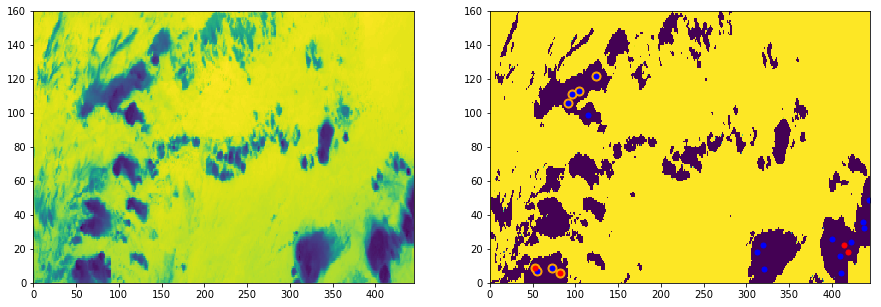

In [117]:
lon, lat = np.meshgrid(ver_day['lon'], ver_day['lat'])

f = plt.figure(figsize=(15,5))
f.add_subplot(121)
plt.pcolormesh(ver_day['tir'][0,:,:])

npos = np.where(ver_day['blobs'][0,:,:]<-100)

mpos = np.where((mfday>=15) & (mfday<=65))

#ipdb.set_trace()

    
f.add_subplot(122)
for ids, ms in msg_day1.iterrows():
    
    try:
        point = ver_day.sel(lat=ms['lat'], lon=ms['lon'], method='nearest', tolerance=0.04)
    except KeyError:
        ipdb.set_trace()
    plat = point['lat'].values
    plon = point['lon'].values


    xpos = np.where(ver_day['lon'].values == plon)
    xpos = int(xpos[0])
    ypos = np.where(ver_day['lat'].values == plat)
    ypos = int(ypos[0])

    plt.plot(xpos, ypos, color='orange', markersize=9, marker='o')
    
for y,x, col in zip(yloc, xloc, color):
    
   # ipdb.set_trace()
    
    plt.plot(x,y,color=col, markersize=5, marker='o')
    
# for y,x in zip(mpos[0], mpos[1]):
    
#     xx = mfday.lon[x]
#     yy = mfday.lat[y]
    
#     try:
#         point = ver_day.sel(lat=yy.values, lon=xx.values, method='nearest', tolerance=0.04)
#     except KeyError:
#         ipdb.set_trace()
#     plat = point['lat'].values
#     plon = point['lon'].values


#     xpos = np.where(ver_day['lon'].values == plon)
#     xpos = int(xpos[0])
#     ypos = np.where(ver_day['lat'].values == plat)
#     ypos = int(ypos[0])

#     plt.plot(xpos, ypos, color='green', markersize=4, marker='o')
    

    
plt.pcolormesh(ver_day['tir'][0,:,:], vmax=-65, vmin=-90)